In [1]:
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from PIL import Image
from sklearn.naive_bayes import GaussianNB
import shutil

In [2]:
# Define function to load and preprocess images
def load_and_preprocess_images(image_paths):
    # Initialize an empty list to store preprocessed images
    preprocessed_images = []
    for image_path in image_paths:
        # Load image
        image = Image.open(image_path)
        # Preprocess image (resize, normalize, etc.)
        # Example: resize image to (224, 224) and normalize pixel values to [0, 1]
        image = image.resize((224, 224))  
        image = np.array(image) / 255.0  # Normalize pixel values
        # Append preprocessed image to the list
        preprocessed_images.append(image)
    # Convert list of images to a 4D array (num_samples, height, width, channels)
    preprocessed_images = np.array(preprocessed_images)
    # Reshape the array to 2D (num_samples, height * width * channels)
    preprocessed_images = preprocessed_images.reshape(preprocessed_images.shape[0], -1)
    return preprocessed_images

In [3]:
def count_images(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                count += 1
    return count
#testing the number of images for testing
test_dir = '/kaggle/input/cotton-disease-dataset/Cotton Disease/test'
num_images = count_images(test_dir)
print(f'Total number of images in the test dataset: {num_images}')
#testing the number of images for training
test_dir = '/kaggle/input/cotton-disease-dataset/Cotton Disease/train'
num_images = count_images(test_dir)
print(f'Total number of images in the training dataset: {num_images}')
#testing the number of images for val
test_dir = '/kaggle/input/cotton-disease-dataset/Cotton Disease/val'
num_images = count_images(test_dir)
print(f'Total number of images in the val dataset: {num_images}')

Total number of images in the test dataset: 106
Total number of images in the training dataset: 1951
Total number of images in the val dataset: 253


In [4]:
# Define function for local model training
def local_train(X_local, y_local):
    clf = SVC(kernel='linear', probability=True, random_state=42)
    clf.fit(X_local, y_local)
    return clf


In [5]:
# Define function for model evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    y_pred_proba = model.predict_proba(X_test)
    return accuracy, y_pred, y_pred_proba


In [6]:
data = "/kaggle/input/cotton-disease-dataset/Cotton Disease"
# Define paths to the train, test, and val directories
train_path = '/kaggle/input/cotton-disease-dataset/Cotton Disease/train'
test_path = '/kaggle/input/cotton-disease-dataset/Cotton Disease/test'
val_path = '/kaggle/input/cotton-disease-dataset/Cotton Disease/val'
# Define the path to the combined directory
combined_path = '/kaggle/working/combined_dataset'

# Create the combined directory if it doesn't exist
os.makedirs(combined_path, exist_ok=True)
# Function to copy images from source directory to destination directory
def copy_images(source_dir, dest_dir):
    for subdir in os.listdir(source_dir):
        subdir_path = os.path.join(source_dir, subdir)
        if os.path.isdir(subdir_path):
            for file in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, file)
                if os.path.isfile(file_path):
                    dest_subdir_path = os.path.join(dest_dir, subdir)
                    os.makedirs(dest_subdir_path, exist_ok=True)
                    try:
                        shutil.copy(file_path, os.path.join(dest_subdir_path, file))
                        print(f"Successfully copied: {file_path}")
                    except Exception as e:
                        print(f"Error copying file: {file_path}, Error: {e}")
# Copy images from train directory
copy_images(train_path, combined_path)

# Copy images from test directory
copy_images(test_path, combined_path)

# Copy images from val directory
copy_images(val_path, combined_path)

print("Images combined successfully.")


Successfully copied: /kaggle/input/cotton-disease-dataset/Cotton Disease/train/fresh cotton plant/dsd (206)_iaip.jpg
Successfully copied: /kaggle/input/cotton-disease-dataset/Cotton Disease/train/fresh cotton plant/dsd (387)_iaip.jpg
Successfully copied: /kaggle/input/cotton-disease-dataset/Cotton Disease/train/fresh cotton plant/dsd (326)_iaip.jpg
Successfully copied: /kaggle/input/cotton-disease-dataset/Cotton Disease/train/fresh cotton plant/dsd (416)_iaip.jpg
Successfully copied: /kaggle/input/cotton-disease-dataset/Cotton Disease/train/fresh cotton plant/dsd (258)_iaip(1).jpg
Successfully copied: /kaggle/input/cotton-disease-dataset/Cotton Disease/train/fresh cotton plant/dsd (272)_iaip.jpg
Successfully copied: /kaggle/input/cotton-disease-dataset/Cotton Disease/train/fresh cotton plant/dsd (265)_iaip(1).jpg
Successfully copied: /kaggle/input/cotton-disease-dataset/Cotton Disease/train/fresh cotton plant/dsd (516)_iaip.jpg
Successfully copied: /kaggle/input/cotton-disease-dataset/

In [7]:
# Directory containing the dataset
dataset_dir = "/kaggle/working/combined_dataset"

In [8]:
# List of classes (subdirectories) in the dataset directory
classes = os.listdir(dataset_dir)


In [9]:
# Combine all data from different classes
X, y = [], []
for class_name in classes:
    class_dir = os.path.join(dataset_dir, class_name)
    image_files = os.listdir(class_dir)
    for image_file in image_files:
        image_path = os.path.join(class_dir, image_file)
        X.append(image_path)
        y.append(class_name)


In [10]:
# Convert class labels to numeric labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
# Load and preprocess images for the training set
X_train_processed = load_and_preprocess_images(X_train)


In [13]:
# Train the local model
local_model = local_train(X_train_processed, y_train)


In [14]:
# Load and preprocess images for the testing set
X_test_processed = load_and_preprocess_images(X_test)


In [15]:
# Define function for local model training using Naive Bayes
def local_train_nb(X_local, y_local):
    clf = GaussianNB()
    clf.fit(X_local, y_local)
    return clf

In [16]:
# Train the local model using Naive Bayes
local_model_nb = local_train_nb(X_train_processed, y_train)


In [17]:
# Evaluate the local model using Naive Bayes
accuracy_nb, y_pred_nb, y_pred_proba_nb = evaluate_model(local_model_nb, X_test_processed, y_test)
print(f"Local Model Accuracy (Naive Bayes): {accuracy_nb * 100:.2f}%")


# Calculate ROC AUC score using predicted probabilities for Naive Bayes
roc_auc_nb = roc_auc_score(y_test, y_pred_proba_nb, average='macro', multi_class='ovr')
print("ROC AUC Score (Naive Bayes):", roc_auc_nb)

# Generate classification report for Naive Bayes
print("Classification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb))


Local Model Accuracy (Naive Bayes): 62.61%
ROC AUC Score (Naive Bayes): 0.7516467501355678
Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.68      0.65      0.67       100
           1       0.70      0.63      0.66       279
           2       0.68      0.73      0.71       166
           3       0.42      0.47      0.44       145

    accuracy                           0.63       690
   macro avg       0.62      0.62      0.62       690
weighted avg       0.63      0.63      0.63       690



In [18]:
# Generate confusion matrix for Naive Bayes
print("Confusion Matrix (Naive Bayes):")
print(confusion_matrix(y_test, y_pred_nb))

Confusion Matrix (Naive Bayes):
[[ 65   9  18   8]
 [ 15 177  30  57]
 [ 12   4 122  28]
 [  3  64  10  68]]


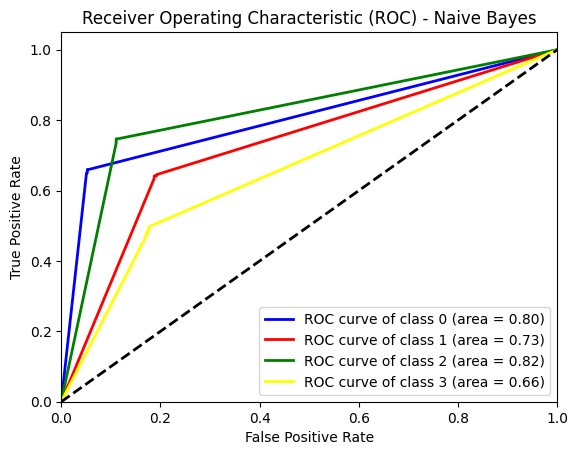

In [19]:
# Plot ROC curve for Naive Bayes
n_classes = len(classes)
y_test_binarized = label_binarize(y_test, classes=np.arange(n_classes))
fpr_nb = dict()
tpr_nb = dict()
roc_auc_nb = dict()
for i in range(n_classes):
    fpr_nb[i], tpr_nb[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba_nb[:, i])
    roc_auc_nb[i] = auc(fpr_nb[i], tpr_nb[i])

plt.figure()
colors = ['blue', 'red', 'green', 'yellow']  # Add more colors if needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_nb[i], tpr_nb[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc_nb[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

# NAIVE BAYES MODEL WITHOUT COMBINING DATASETS

Accuracy: 67.92%
              precision    recall  f1-score   support

           0       0.58      0.56      0.57        25
           1       0.66      0.82      0.73        28
           2       0.74      0.88      0.81        26
           3       0.75      0.44      0.56        27

    accuracy                           0.68       106
   macro avg       0.68      0.68      0.67       106
weighted avg       0.68      0.68      0.67       106

ROC AUC Score: 0.88


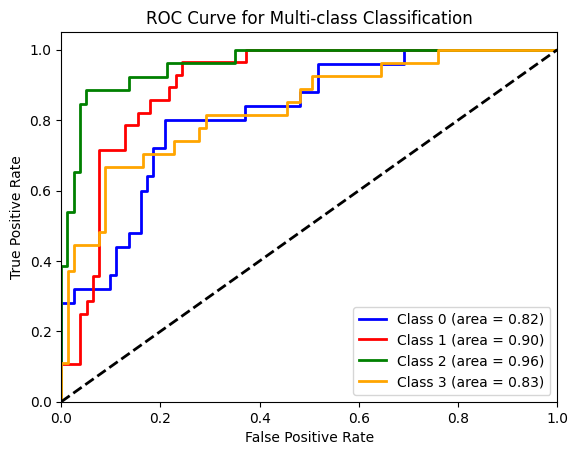

Confusion Matrix:
[[14  4  6  1]
 [ 3 23  0  2]
 [ 2  0 23  1]
 [ 5  8  2 12]]
Total number of test samples: 106
Total number of entries in confusion matrix: 106
The total number of test samples matches the total entries in the confusion matrix.


In [20]:
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

# Function to load and preprocess images with HOG features
def load_and_preprocess_images_hog(image_paths):
    hog_features = []
    for image_path in image_paths:
        image = Image.open(image_path).convert('L')  # Convert to grayscale
        image = image.resize((128, 128))  # Resize image
        image = np.array(image) / 255.0  # Normalize pixel values
        # Extract HOG features
        features, _ = hog(image, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True)
        hog_features.append(features)
    return np.array(hog_features)

# Load images and labels
def load_data(data_dir):
    X, y = [], []
    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        for image_file in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_file)
            X.append(image_path)
            y.append(class_name)
    return X, y

# Define paths to the train, test, and val directories
train_path = '/kaggle/input/cotton-disease-dataset/Cotton Disease/train'
test_path = '/kaggle/input/cotton-disease-dataset/Cotton Disease/test'
val_path = '/kaggle/input/cotton-disease-dataset/Cotton Disease/val'

# Combine all data from different classes
X_train_paths, y_train = load_data(train_path)
X_test_paths, y_test = load_data(test_path)

# Encode labels to numeric values
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Binarize the labels for ROC curve
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_train_bin.shape[1]

# Preprocess the training and testing data
X_train = load_and_preprocess_images_hog(X_train_paths)
X_test = load_and_preprocess_images_hog(X_test_paths)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train Naive Bayes model
nb_model = OneVsRestClassifier(GaussianNB())
nb_model.fit(X_train_pca, y_train_bin)

# Evaluate the model
y_pred_bin = nb_model.predict(X_test_pca)
y_pred = np.argmax(y_pred_bin, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

# Calculate ROC AUC score for multi-class classification
y_pred_proba = nb_model.predict_proba(X_test_pca)
roc_auc = roc_auc_score(y_test_bin, y_pred_proba, average='macro', multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.2f}")

# Plot ROC curves for each class
fpr = dict()
tpr = dict()
roc_auc_class = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc_class[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curve
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Adjust colors according to number of classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (area = {roc_auc_class[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class Classification')
plt.legend(loc="lower right")
plt.show()

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate the total number of samples in the test dataset
total_test_samples = len(y_test)
print(f"Total number of test samples: {total_test_samples}")

# Calculate the sum of all entries in the confusion matrix
total_cm_entries = np.sum(cm)
print(f"Total number of entries in confusion matrix: {total_cm_entries}")

# Check if the total number of test samples matches the total entries in the confusion matrix
if total_test_samples == total_cm_entries:
    print("The total number of test samples matches the total entries in the confusion matrix.")
else:
    print("The total number of test samples does not match the total entries in the confusion matrix.")


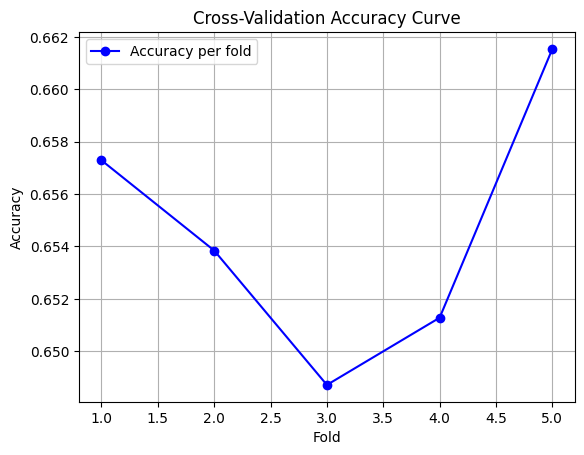

Fold 1 Accuracy: 65.73%
Fold 2 Accuracy: 65.38%
Fold 3 Accuracy: 64.87%
Fold 4 Accuracy: 65.13%
Fold 5 Accuracy: 66.15%
Mean Cross-Validation Accuracy: 65.45%


In [21]:
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from skimage.feature import hog
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

# Function to load and preprocess images with HOG features
def load_and_preprocess_images_hog(image_paths):
    hog_features = []
    for image_path in image_paths:
        image = Image.open(image_path).convert('L')  # Convert to grayscale
        image = image.resize((128, 128))  # Resize image
        image = np.array(image) / 255.0  # Normalize pixel values
        # Extract HOG features
        features, _ = hog(image, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True)
        hog_features.append(features)
    return np.array(hog_features)

# Load images and labels
def load_data(data_dir):
    X, y = [], []
    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        for image_file in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_file)
            X.append(image_path)
            y.append(class_name)
    return X, y

# Define paths to the train and test directories
train_path = '/kaggle/input/cotton-disease-dataset/Cotton Disease/train'
test_path = '/kaggle/input/cotton-disease-dataset/Cotton Disease/test'

# Combine all data from different classes
X_train_paths, y_train = load_data(train_path)

# Encode labels to numeric values
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# Preprocess the training data
X_train = load_and_preprocess_images_hog(X_train_paths)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_pca = pca.fit_transform(X_train)

# Initialize the Naive Bayes model
nb_model = OneVsRestClassifier(GaussianNB())

# Perform Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5)  # 5-fold cross-validation
accuracies = cross_val_score(nb_model, X_train_pca, y_train, cv=cv, scoring='accuracy')

# Plot the Cross-Validation Accuracy Curve
plt.figure()
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', color='b', label='Accuracy per fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy Curve')
plt.legend()
plt.grid(True)
plt.show()

# Print the accuracies and the mean accuracy
for i, acc in enumerate(accuracies):
    print(f"Fold {i+1} Accuracy: {acc * 100:.2f}%")

mean_accuracy = np.mean(accuracies)
print(f"Mean Cross-Validation Accuracy: {mean_accuracy * 100:.2f}%")


# KNN code

Successfully copied: /kaggle/input/cotton-disease-dataset/Cotton Disease/train/fresh cotton plant/dsd (206)_iaip.jpg
Successfully copied: /kaggle/input/cotton-disease-dataset/Cotton Disease/train/fresh cotton plant/dsd (387)_iaip.jpg
Successfully copied: /kaggle/input/cotton-disease-dataset/Cotton Disease/train/fresh cotton plant/dsd (326)_iaip.jpg
Successfully copied: /kaggle/input/cotton-disease-dataset/Cotton Disease/train/fresh cotton plant/dsd (416)_iaip.jpg
Successfully copied: /kaggle/input/cotton-disease-dataset/Cotton Disease/train/fresh cotton plant/dsd (258)_iaip(1).jpg
Successfully copied: /kaggle/input/cotton-disease-dataset/Cotton Disease/train/fresh cotton plant/dsd (272)_iaip.jpg
Successfully copied: /kaggle/input/cotton-disease-dataset/Cotton Disease/train/fresh cotton plant/dsd (265)_iaip(1).jpg
Successfully copied: /kaggle/input/cotton-disease-dataset/Cotton Disease/train/fresh cotton plant/dsd (516)_iaip.jpg
Successfully copied: /kaggle/input/cotton-disease-dataset/

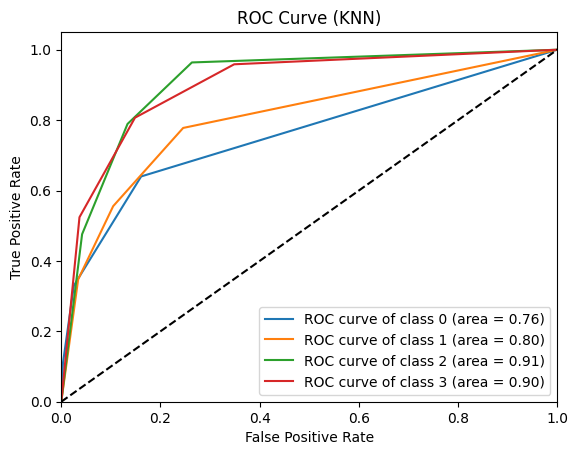

In [22]:
import os
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from PIL import Image
import shutil

# Define function to load and preprocess images
def load_and_preprocess_images(image_paths):
    preprocessed_images = []
    for image_path in image_paths:
        # Load image
        image = Image.open(image_path)
        # Preprocess image (resize, normalize, etc.)
        image = image.resize((224, 224))  
        image = np.array(image) / 255.0  # Normalize pixel values
        preprocessed_images.append(image)
    preprocessed_images = np.array(preprocessed_images)
    preprocessed_images = preprocessed_images.reshape(preprocessed_images.shape[0], -1)
    return preprocessed_images

data = "/kaggle/input/cotton-disease-dataset/Cotton Disease"

# Define paths to the train, test, and val directories
train_path = '/kaggle/input/cotton-disease-dataset/Cotton Disease/train'
test_path = '/kaggle/input/cotton-disease-dataset/Cotton Disease/test'
val_path = '/kaggle/input/cotton-disease-dataset/Cotton Disease/val'

# Define the path to the combined directory
combined_path = '/kaggle/working/combined_dataset'

# Create the combined directory if it doesn't exist
os.makedirs(combined_path, exist_ok=True)

# Function to copy images from source directory to destination directory
def copy_images(source_dir, dest_dir):
    for subdir in os.listdir(source_dir):
        subdir_path = os.path.join(source_dir, subdir)
        if os.path.isdir(subdir_path):
            for file in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, file)
                if os.path.isfile(file_path):
                    dest_subdir_path = os.path.join(dest_dir, subdir)
                    os.makedirs(dest_subdir_path, exist_ok=True)
                    try:
                        shutil.copy(file_path, os.path.join(dest_subdir_path, file))
                        print(f"Successfully copied: {file_path}")
                    except Exception as e:
                        print(f"Error copying file: {file_path}, Error: {e}")

# Copy images from train, test, and val directories
copy_images(train_path, combined_path)
copy_images(test_path, combined_path)
copy_images(val_path, combined_path)

print("Images combined successfully.")

# Directory containing the dataset
dataset_dir = "/kaggle/working/combined_dataset"

# List of classes (subdirectories) in the dataset directory
classes = os.listdir(dataset_dir)

# Combine all data from different classes
X, y = [], []
for class_name in classes:
    class_dir = os.path.join(dataset_dir, class_name)
    image_files = os.listdir(class_dir)
    for image_file in image_files:
        image_path = os.path.join(class_dir, image_file)
        X.append(image_path)
        y.append(class_name)

# Convert class labels to numeric labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Load and preprocess images for the training set
X_train_processed = load_and_preprocess_images(X_train)

# Define function for local model training using KNN
def local_train_knn(X_local, y_local, n_neighbors=3):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_local, y_local)
    return clf

# Train the local model using KNN
local_model_knn = local_train_knn(X_train_processed, y_train)

# Load and preprocess images for the testing set
X_test_processed = load_and_preprocess_images(X_test)

# Define function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, y_pred, y_pred_proba

# Evaluate the local model using KNN
accuracy_knn, y_pred_knn, y_pred_proba_knn = evaluate_model(local_model_knn, X_test_processed, y_test)
print(f"Local Model Accuracy (KNN): {accuracy_knn * 100:.2f}%")

# Calculate ROC AUC score using predicted probabilities for KNN
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn, average='macro', multi_class='ovr')
print("ROC AUC Score (KNN):", roc_auc_knn)

# Generate classification report for KNN
print("Classification Report (KNN):")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix (KNN):\n", cm)

# # Plot Confusion Matrix
# plt.figure(figsize=(8,6))
# plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
# plt.title('Confusion Matrix (KNN)')
# plt.colorbar()
# tick_marks = np.arange(len(classes))
# plt.xticks(tick_marks, classes, rotation=45)
# plt.yticks(tick_marks, classes)
# plt.tight_layout()
# plt.ylabel('True label')
# plt.xlabel('Predicted label')
# plt.show()

# Plot ROC Curve
n_classes = len(classes)
y_test_binarized = label_binarize(y_test, classes=[i for i in range(n_classes)])

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba_knn[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot each class's ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (KNN)')
plt.legend(loc='lower right')
plt.show()


Processed 2310 images
                       precision    recall  f1-score   support

 diseased cotton leaf       0.57      0.18      0.27       114
diseased cotton plant       0.68      0.65      0.67       269
    fresh cotton leaf       0.58      0.78      0.66       143
   fresh cotton plant       0.62      0.78      0.69       167

             accuracy                           0.63       693
            macro avg       0.61      0.60      0.57       693
         weighted avg       0.63      0.63      0.61       693

Accuracy: 62.91%
Confusion matrix is:
[[ 20  40  43  11]
 [  5 175  31  58]
 [  9  13 111  10]
 [  1  28   8 130]]


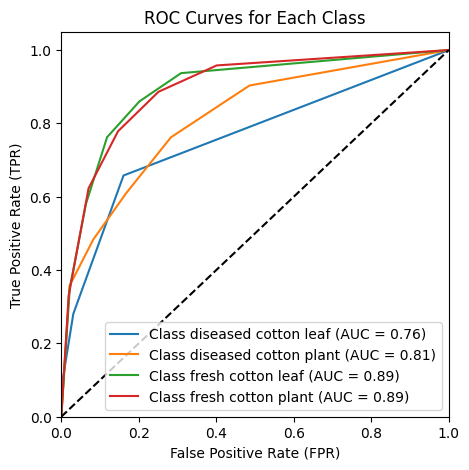

In [23]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns  # Import seaborn for heatmap plotting

# Function to get a list of all files in a directory and its subdirectories
def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = []
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

# Fetch image paths from different subdirectories
imagePaths_fp = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/test")
imagePaths_fl = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/train")
imagePaths_dl = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/val")

# Combine all image paths into a single list
imagePaths = imagePaths_dl + imagePaths_fl + imagePaths_fp

data = []
labels = []
c = 0  # To track the progress

# Loop through each image, load it, and preprocess it
for image in imagePaths:
    label = os.path.split(os.path.split(image)[0])[1]
    labels.append(label)

    img = cv2.imread(image)
    img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_AREA)
    data.append(img)
    c += 1
print(f"Processed {c} images")

# Encode the labels as integers
data = np.array(data)
labels = np.array(labels)

le = LabelEncoder()
labels = le.fit_transform(labels)

# Split dataset into 70% training and 30% testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.30, random_state=42)

# Normalize image data (optional but improves performance)
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

# Flatten the images for KNN
trainX_flat = trainX.reshape(trainX.shape[0], -1)  # Reshape to (num_samples, height * width * channels)
testX_flat = testX.reshape(testX.shape[0], -1)

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed

# Train the KNN model
knn.fit(trainX_flat, trainY)

# Make predictions
predictions = knn.predict(testX_flat)

# Print classification report
print(classification_report(testY, predictions, target_names=le.classes_))

# Calculate accuracy
accuracy = accuracy_score(testY, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
conf_matrix = confusion_matrix(testY, predictions)
print("Confusion matrix is:")
print(conf_matrix)

# ROC curve and AUC calculation
# Binarize the output
y_bin = label_binarize(testY, classes=list(range(len(le.classes_))))

# Variables for ROC calculation
tpr = dict()
fpr = dict()
roc_auc = dict()

# Calculate ROC for each class
for i in range(len(le.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], knn.predict_proba(testX_flat)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(5, 5))

for i in range(len(le.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--')

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Each Class')
plt.legend(loc="lower right")
plt.show()


# CNN Code without Data Augmentation

2024-10-27 01:38:05.317626: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-27 01:38:05.317765: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-27 01:38:05.490946: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Processed 2310 images
Epoch 1/10


I0000 00:00:1729993123.967792      78 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


51/51 [==============================] - 6s 19ms/step - loss: 1.1643 - accuracy: 0.4725 - val_loss: 1.0497 - val_accuracy: 0.5397
Epoch 2/10
51/51 [==============================] - 0s 5ms/step - loss: 0.9715 - accuracy: 0.5962 - val_loss: 0.9108 - val_accuracy: 0.6595
Epoch 3/10
51/51 [==============================] - 0s 5ms/step - loss: 0.8249 - accuracy: 0.6809 - val_loss: 0.7819 - val_accuracy: 0.7114
Epoch 4/10
51/51 [==============================] - 0s 5ms/step - loss: 0.6993 - accuracy: 0.7254 - val_loss: 0.6821 - val_accuracy: 0.7489
Epoch 5/10
51/51 [==============================] - 0s 5ms/step - loss: 0.5633 - accuracy: 0.7798 - val_loss: 0.5975 - val_accuracy: 0.7778
Epoch 6/10
51/51 [==============================] - 0s 5ms/step - loss: 0.4939 - accuracy: 0.8033 - val_loss: 0.5524 - val_accuracy: 0.7821
Epoch 7/10
51/51 [==============================] - 0s 6ms/step - loss: 0.4073 - accuracy: 0.8522 - val_loss: 0.4408 - val_accuracy: 0.8384
Epoch 8/10
51/51 [============

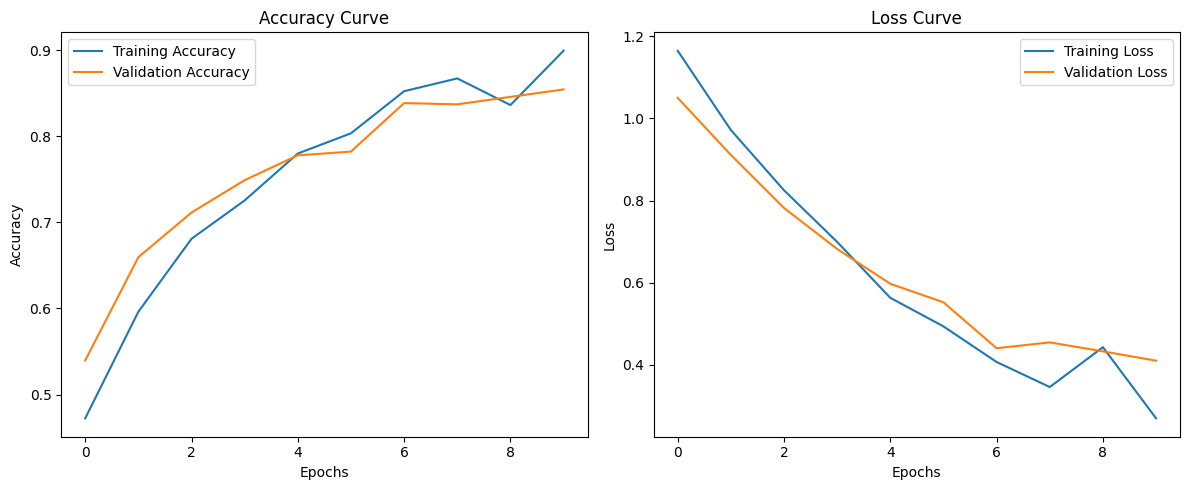

22/22 [==============================] - 0s 2ms/step
                       precision    recall  f1-score   support

 diseased cotton leaf       0.85      0.97      0.91       114
diseased cotton plant       0.82      0.91      0.86       269
    fresh cotton leaf       0.96      0.83      0.89       143
   fresh cotton plant       0.84      0.70      0.76       167

             accuracy                           0.85       693
            macro avg       0.87      0.85      0.86       693
         weighted avg       0.86      0.85      0.85       693

Accuracy: 85.43%
Confusion matrix is:
[[111   0   2   1]
 [  4 245   2  18]
 [ 11   9 119   4]
 [  4  45   1 117]]


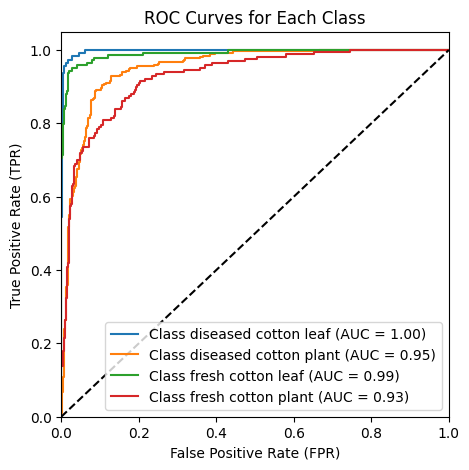

In [24]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import seaborn as sns  # Make sure to import seaborn for heatmap plotting


# Function to get a list of all files in a directory and its subdirectories
def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = []
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

# Fetch image paths from different subdirectories
imagePaths_fp = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/test")
imagePaths_fl = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/train")
imagePaths_dl = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/val")

# Combine all image paths into a single list
imagePaths = imagePaths_dl + imagePaths_fl + imagePaths_fp

data = []
labels = []
c = 0  # To track the progress

# Loop through each image, load it, and preprocess it
for image in imagePaths:
    label = os.path.split(os.path.split(image)[0])[1]
    labels.append(label)

    img = cv2.imread(image)
    img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_AREA)
    data.append(img)
    c += 1
print(f"Processed {c} images")

# Encode the labels as integers
data = np.array(data)
labels = np.array(labels)

le = LabelEncoder()
labels = le.fit_transform(labels)

# Convert labels to categorical (one-hot encoding)
labels = to_categorical(labels)

# Split dataset into 70% training and 30% testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.30, random_state=42)

# Normalize image data (optional but improves performance)
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

# Build a CNN model
model = Sequential()

# Add convolutional, pooling, and fully connected layers
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

# Add fully connected (dense) layers
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# Output layer (number of classes must match the number of labels)
num_classes = labels.shape[1]
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY))

# Plot accuracy and loss curves
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Predictions
predictions = model.predict(testX)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(testY, axis=1)

# Print classification report
print(classification_report(true_labels, predicted_labels, target_names=le.classes_))

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix is:")
print(conf_matrix)

# ROC curve and AUC calculation
# Get probabilities for ROC calculation
y_bin = label_binarize(true_labels, classes=list(range(num_classes)))

# Variables for ROC calculation
tpr = dict()
fpr = dict()
roc_auc = dict()

# Calculate ROC for each class
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(5, 5))

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--')

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Each Class')
plt.legend(loc="lower right")
plt.show()


# CCN Code using Data Augmentation

Processed 2310 images
Epoch 1/10
51/51 [==============================] - 3s 27ms/step - loss: 1.2062 - accuracy: 0.4490 - val_loss: 1.1220 - val_accuracy: 0.4646
Epoch 2/10
51/51 [==============================] - 1s 24ms/step - loss: 1.0287 - accuracy: 0.5572 - val_loss: 0.9495 - val_accuracy: 0.6176
Epoch 3/10
51/51 [==============================] - 1s 24ms/step - loss: 0.9248 - accuracy: 0.6339 - val_loss: 0.8495 - val_accuracy: 0.6407
Epoch 4/10
51/51 [==============================] - 1s 24ms/step - loss: 0.8600 - accuracy: 0.6469 - val_loss: 0.7723 - val_accuracy: 0.6984
Epoch 5/10
51/51 [==============================] - 1s 24ms/step - loss: 0.7712 - accuracy: 0.6877 - val_loss: 0.7272 - val_accuracy: 0.6811
Epoch 6/10
51/51 [==============================] - 1s 25ms/step - loss: 0.7222 - accuracy: 0.7075 - val_loss: 0.7129 - val_accuracy: 0.6782
Epoch 7/10
51/51 [==============================] - 1s 24ms/step - loss: 0.6263 - accuracy: 0.7452 - val_loss: 0.4962 - val_accuracy

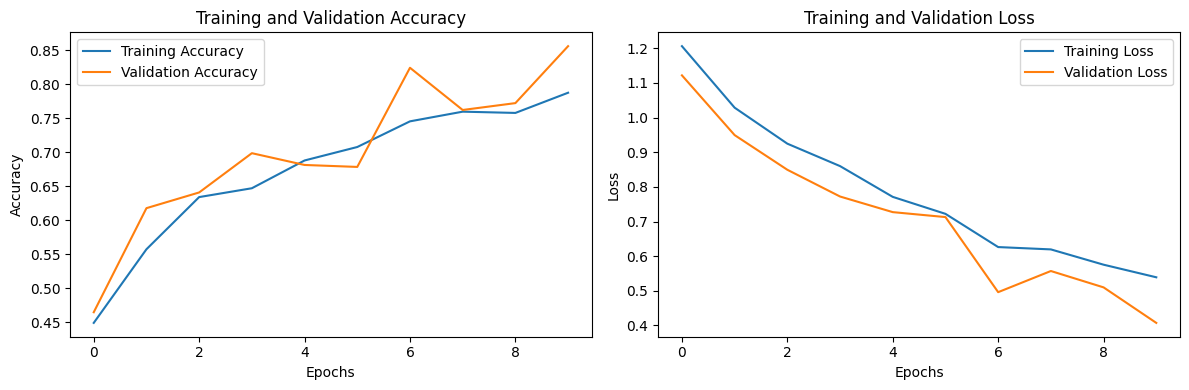

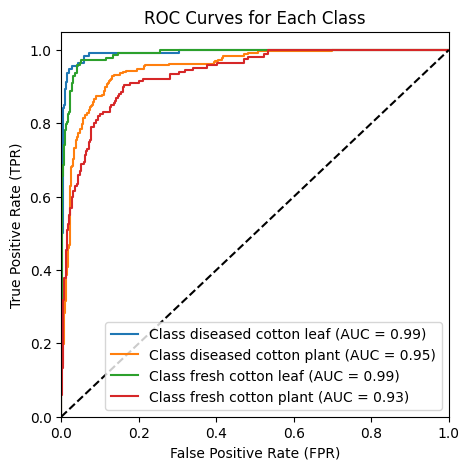

In [25]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns  # Make sure to import seaborn for heatmap plotting

# Function to get a list of all files in a directory and its subdirectories
def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = []
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

# Fetch image paths from different subdirectories
imagePaths_fp = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/test")
imagePaths_fl = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/train")
imagePaths_dl = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/val")

# Combine all image paths into a single list
imagePaths = imagePaths_dl + imagePaths_fl + imagePaths_fp

data = []
labels = []
c = 0  # To track the progress

# Loop through each image, load it, and preprocess it
for image in imagePaths:
    label = os.path.split(os.path.split(image)[0])[1]
    labels.append(label)

    img = cv2.imread(image)
    img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_AREA)
    data.append(img)
    c += 1
print(f"Processed {c} images")

# Encode the labels as integers
data = np.array(data)
labels = np.array(labels)

le = LabelEncoder()
labels = le.fit_transform(labels)

# Convert labels to categorical (one-hot encoding)
labels = to_categorical(labels)

# Split dataset into 70% training and 30% testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.30, random_state=42)

# Normalize image data (optional but improves performance)
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

# Data Augmentation using ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,       # Randomly rotate images
    width_shift_range=0.2,   # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.15,        # Shear transformations
    zoom_range=0.15,         # Zoom transformations
    horizontal_flip=True,    # Flip images horizontally
    fill_mode='nearest'      # Fill in new pixels with nearest neighbors
)

# Fit the generator to the training data
datagen.fit(trainX)

# Build a CNN model
model = Sequential()

# Add convolutional, pooling, and fully connected layers
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

# Add fully connected (dense) layers
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# Output layer (number of classes must match the number of labels)
num_classes = labels.shape[1]
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the augmented data
history = model.fit(datagen.flow(trainX, trainY, batch_size=32), epochs=10, validation_data=(testX, testY))

# Predictions
predictions = model.predict(testX)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(testY, axis=1)

# Print classification report
print(classification_report(true_labels, predicted_labels, target_names=le.classes_))

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix is:")
print(conf_matrix)
# Plotting Accuracy and Loss Curves
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

# ROC curve and AUC calculation
# Get probabilities for ROC calculation
y_bin = label_binarize(true_labels, classes=list(range(num_classes)))

# Variables for ROC calculation
tpr = dict()
fpr = dict()
roc_auc = dict()

# Calculate ROC for each class
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(5, 5))

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--')

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Each Class')
plt.legend(loc="lower right")
plt.show()


In [26]:
# CNN with VGG16 using DA , similarly not 
# power point of results - monday - done
# include ROC curve with four classes - done
# KNN using federated learning

# CNN with VGG16 without data augmentation

Processed 2310 images
58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
51/51 [==============================] - 32s 425ms/step - loss: 1.1236 - accuracy: 0.5121 - val_loss: 0.6914 - val_accuracy: 0.7417
Epoch 2/10
51/51 [==============================] - 9s 177ms/step - loss: 0.7435 - accuracy: 0.6797 - val_loss: 0.5448 - val_accuracy: 0.8095
Epoch 3/10
51/51 [==============================] - 9s 178ms/step - loss: 0.5837 - accuracy: 0.7675 - val_loss: 0.4209 - val_accuracy: 0.8557
Epoch 4/10
51/51 [==============================] - 9s 180ms/step - loss: 0.4637 - accuracy: 0.8306 - val_loss: 0.3549 - val_accuracy: 0.8817
Epoch 5/10
51/51 [==============================] - 9s 184ms/step - loss: 0.3764 - accuracy: 0.8683 - val_loss: 0.3130 - val_accuracy: 0.8947
Epoch 6/10
51/51 [==============================] - 10s 189ms/step - loss: 0.3358 - accuracy: 0.8856 - val_loss: 0.2950 - val_accuracy: 0.8961
Epoch 7/10
51/51 [==============================] - 10s 192

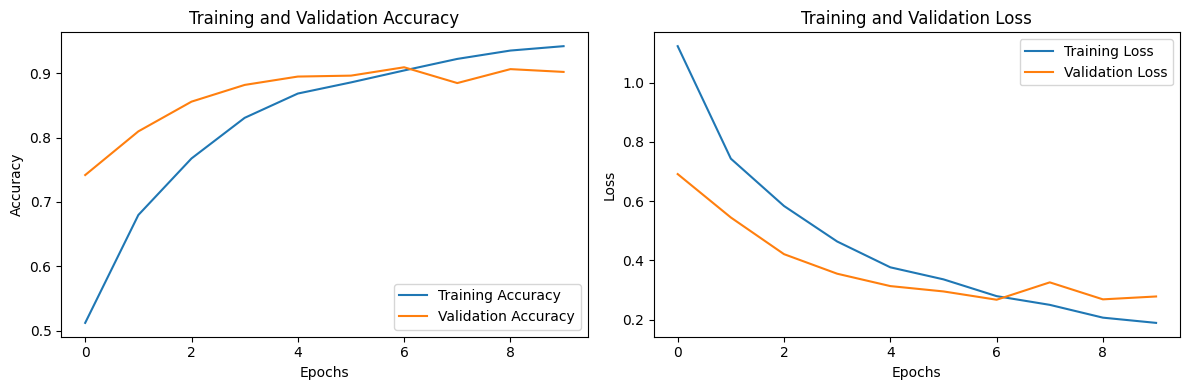

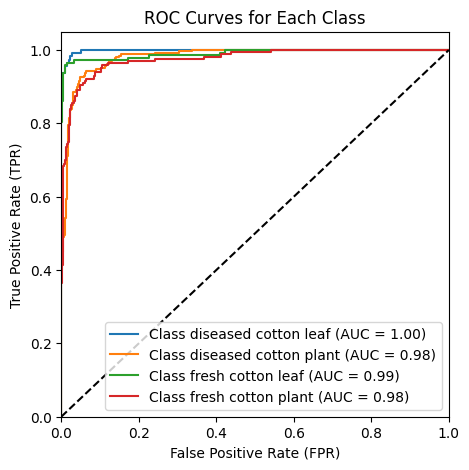

In [27]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

# Function to get a list of all files in a directory and its subdirectories
def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = []
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

# Fetch image paths from different subdirectories
imagePaths_fp = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/test")
imagePaths_fl = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/train")
imagePaths_dl = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/val")

# Combine all image paths into a single list
imagePaths = imagePaths_dl + imagePaths_fl + imagePaths_fp

data = []
labels = []
c = 0  # To track the progress

# Loop through each image, load it, and preprocess it
for image in imagePaths:
    label = os.path.split(os.path.split(image)[0])[1]
    labels.append(label)

    img = cv2.imread(image)
    img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # VGG16 input size is 224x224
    data.append(img)
    c += 1
print(f"Processed {c} images")

# Encode the labels as integers
data = np.array(data)
labels = np.array(labels)

le = LabelEncoder()
labels = le.fit_transform(labels)

# Convert labels to categorical (one-hot encoding)
labels = to_categorical(labels)

# Split dataset into 70% training and 30% testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.30, random_state=42)

# Normalize image data (optional but improves performance)
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

# Load the VGG16 model, excluding the top fully connected layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base VGG16 layers to prevent them from being trained
for layer in vgg_base.layers:
    layer.trainable = False

# Build a new model on top of VGG16
model = Sequential()

# Add the VGG16 base model
model.add(vgg_base)

# Flatten the output from VGG16
model.add(Flatten())

# Add custom fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Add dropout to reduce overfitting
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer (number of classes must match the number of labels)
num_classes = labels.shape[1]
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model without data augmentation
history = model.fit(trainX, trainY, batch_size=32, epochs=10, validation_data=(testX, testY))

# Predictions
predictions = model.predict(testX)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(testY, axis=1)

# Print classification report
print(classification_report(true_labels, predicted_labels, target_names=le.classes_))

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix is:")
print(conf_matrix)

# Plotting Accuracy and Loss Curves
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

# ROC curve and AUC calculation
# Get probabilities for ROC calculation
y_bin = label_binarize(true_labels, classes=list(range(num_classes)))

# Variables for ROC calculation
tpr = dict()
fpr = dict()
roc_auc = dict()

# Calculate ROC for each class
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(5, 5))

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--')

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Each Class')
plt.legend(loc="lower right")
plt.show()


# CNN using VGG16 with Data augmentation

Epoch 1/10
51/51 [==============================] - 21s 375ms/step - loss: 1.3415 - accuracy: 0.4088 - val_loss: 0.9299 - val_accuracy: 0.5772
Epoch 2/10
51/51 [==============================] - 19s 369ms/step - loss: 0.9879 - accuracy: 0.5622 - val_loss: 0.6606 - val_accuracy: 0.7677
Epoch 3/10
51/51 [==============================] - 19s 367ms/step - loss: 0.8241 - accuracy: 0.6623 - val_loss: 0.5689 - val_accuracy: 0.7994
Epoch 4/10
51/51 [==============================] - 18s 355ms/step - loss: 0.7096 - accuracy: 0.7050 - val_loss: 0.4928 - val_accuracy: 0.8081
Epoch 5/10
51/51 [==============================] - 18s 359ms/step - loss: 0.6806 - accuracy: 0.7211 - val_loss: 0.4865 - val_accuracy: 0.8081
Epoch 6/10
51/51 [==============================] - 18s 357ms/step - loss: 0.5851 - accuracy: 0.7588 - val_loss: 0.3848 - val_accuracy: 0.8701
Epoch 7/10
51/51 [==============================] - 19s 365ms/step - loss: 0.5613 - accuracy: 0.7669 - val_loss: 0.3593 - val_accuracy: 0.8802

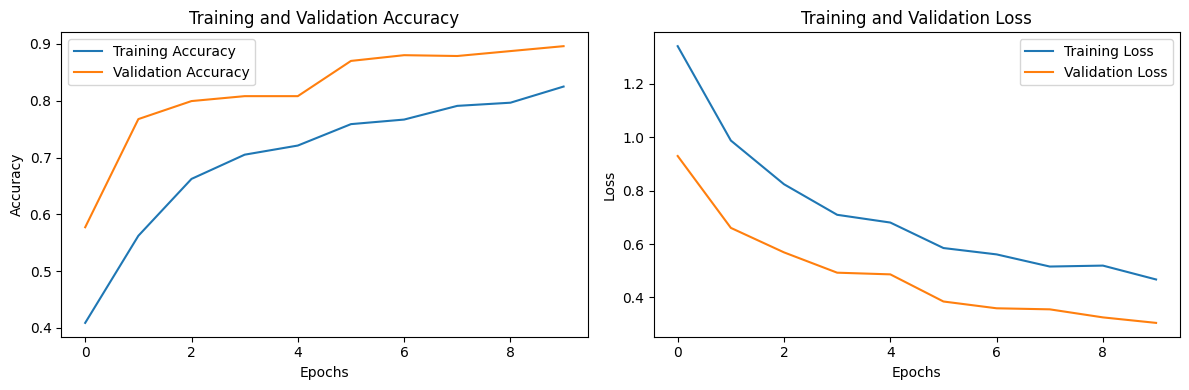

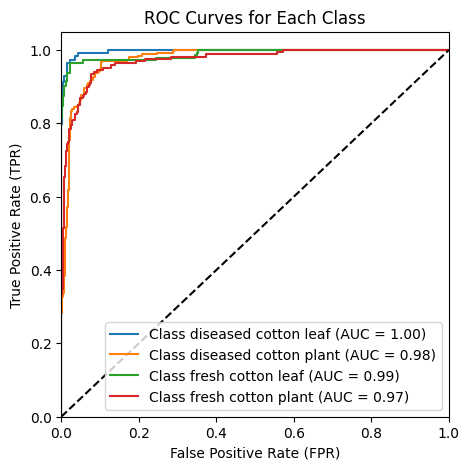

In [28]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Function to get a list of all files in a directory and its subdirectories
def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = []
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

# Fetch image paths from different subdirectories
imagePaths_fp = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/test")
imagePaths_fl = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/train")
imagePaths_dl = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/val")

# Combine all image paths into a single list
imagePaths = imagePaths_dl + imagePaths_fl + imagePaths_fp

data = []
labels = []

# Loop through each image, load it, and preprocess it
for image in imagePaths:
    label = os.path.split(os.path.split(image)[0])[1]
    labels.append(label)

    img = cv2.imread(image)
    img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # VGG16 input size is 224x224
    data.append(img)

# Encode the labels as integers
data = np.array(data)
labels = np.array(labels)

le = LabelEncoder()
labels = le.fit_transform(labels)

# Convert labels to categorical (one-hot encoding)
labels = to_categorical(labels)

# Split dataset into 70% training and 30% testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.30, random_state=42)

# Normalize image data (optional but improves performance)
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

# Data Augmentation using ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,       # Randomly rotate images
    width_shift_range=0.2,   # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.15,        # Shear transformations
    zoom_range=0.15,         # Zoom transformations
    horizontal_flip=True,    # Flip images horizontally
    fill_mode='nearest'      # Fill in new pixels with nearest neighbors
)

# Fit the generator to the training data
datagen.fit(trainX)

# Load the VGG16 model, excluding the top fully connected layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base VGG16 layers to prevent them from being trained
for layer in vgg_base.layers:
    layer.trainable = False

# Build a new model on top of VGG16
model = Sequential()

# Add the VGG16 base model
model.add(vgg_base)

# Flatten the output from VGG16
model.add(Flatten())

# Add custom fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Add dropout to reduce overfitting
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer (number of classes must match the number of labels)
num_classes = labels.shape[1]
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the augmented data
history = model.fit(datagen.flow(trainX, trainY, batch_size=32), epochs=10, validation_data=(testX, testY))

# Predictions
predictions = model.predict(testX)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(testY, axis=1)

# Print classification report
print(classification_report(true_labels, predicted_labels, target_names=le.classes_))

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix is:")
print(conf_matrix)

# Plotting Accuracy and Loss Curves
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

# ROC curve and AUC calculation
# Get probabilities for ROC calculation
y_bin = label_binarize(true_labels, classes=list(range(num_classes)))

# Variables for ROC calculation
tpr = dict()
fpr = dict()
roc_auc = dict()

# Calculate ROC for each class
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(5, 5))

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--')

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Each Class')
plt.legend(loc="lower right")
plt.show()


Update the word paper(discussion), Knn using federated learning

Federated KNN Accuracy: 61.18%
                       precision    recall  f1-score   support

 diseased cotton leaf       0.57      0.24      0.34       114
diseased cotton plant       0.67      0.61      0.64       269
    fresh cotton leaf       0.56      0.76      0.64       143
   fresh cotton plant       0.60      0.74      0.66       167

             accuracy                           0.61       693
            macro avg       0.60      0.59      0.57       693
         weighted avg       0.62      0.61      0.60       693

Confusion matrix is:
[[ 27  39  40   8]
 [  5 165  37  62]
 [ 12  10 108  13]
 [  3  31   9 124]]


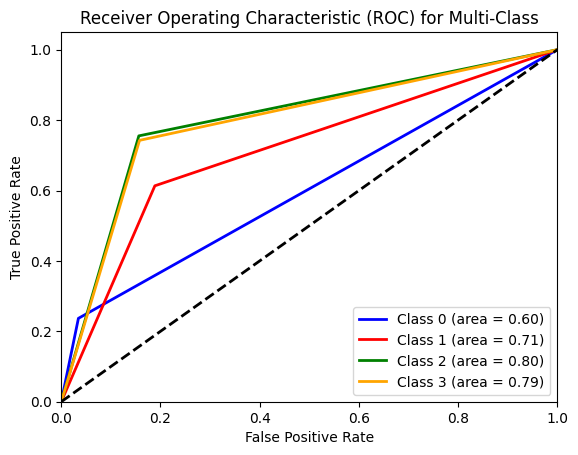

Overall ROC AUC Score: 0.73


In [29]:
import os
import numpy as np
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Helper function to load images
def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = []
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

# Fetch image paths from different subdirectories
imagePaths_fp = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/test")
imagePaths_fl = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/train")
imagePaths_dl = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/val")

# Combine all image paths into a single list
imagePaths = imagePaths_dl + imagePaths_fl + imagePaths_fp

data = []
labels = []

# Loop through each image, load it, and preprocess it
for image in imagePaths:
    label = os.path.split(os.path.split(image)[0])[1]
    labels.append(label)

    img = cv2.imread(image)
    img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
    data.append(img)

# Encode the labels as integers
data = np.array(data)
labels = np.array(labels)

le = LabelEncoder()
labels = le.fit_transform(labels)

# Split dataset into 70% training and 30% testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.30, random_state=42)

# Normalize image data
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

# PyTorch dataset definition
class ImageDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Data transformation (PyTorch's transforms for data augmentation)
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor()
])

# Create PyTorch Datasets and DataLoaders
train_dataset = ImageDataset(trainX, trainY, transform=transform)
test_dataset = ImageDataset(testX, testY, transform=transforms.ToTensor())

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Partition the data to simulate clients in Federated Learning
def create_clients(data, labels, num_clients=5):
    client_data = []
    split_size = len(data) // num_clients
    for i in range(num_clients):
        client_data.append((data[i * split_size:(i + 1) * split_size], labels[i * split_size:(i + 1) * split_size]))
    return client_data

# Create 5 clients
clients = create_clients(trainX, trainY, num_clients=5)

# Federated Learning process with KNN on each client
def client_knn_train(client_data, n_neighbors=3):
    # Unpack client data
    X_train, y_train = client_data
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train.reshape(X_train.shape[0], -1), y_train)
    return knn

# Train KNN model on each client and store the models
client_models = []
for client_data in clients:
    model = client_knn_train(client_data)
    client_models.append(model)

# Aggregate predictions from clients
def federated_knn_predict(client_models, X_test):
    # Reshape test data to fit KNN input
    X_test = X_test.reshape(X_test.shape[0], -1)
    predictions = []

    # Each client predicts
    for model in client_models:
        preds = model.predict(X_test)
        predictions.append(preds)
    
    # Aggregate predictions (e.g., majority vote)
    predictions = np.array(predictions)
    aggregated_predictions = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)
    
    return aggregated_predictions

# Test the federated KNN model
predicted_labels = federated_knn_predict(client_models, testX)

# Calculate accuracy
accuracy = accuracy_score(testY, predicted_labels)
print(f"Federated KNN Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print(classification_report(testY, predicted_labels, target_names=le.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(testY, predicted_labels)
print("Confusion matrix is:")
print(conf_matrix)

# Binarize the labels for ROC calculation (one-vs-rest)
n_classes = len(np.unique(testY))
y_test_bin = label_binarize(testY, classes=[0, 1, 2, 3])  # Assume 4 classes, replace with your actual number of classes
y_pred_bin = label_binarize(predicted_labels, classes=[0, 1, 2, 3])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for all classes
plt.figure()
colors = ['blue', 'red', 'green', 'orange']  # One color per class

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multi-Class')
plt.legend(loc="lower right")
plt.show()

# Print ROC AUC score for overall model
roc_auc_score_value = roc_auc_score(y_test_bin, y_pred_bin, average='macro')
print(f"Overall ROC AUC Score: {roc_auc_score_value:.2f}")


# kNN Federated Learning

Federated KNN Accuracy: 61.18%
                       precision    recall  f1-score   support

 diseased cotton leaf       0.57      0.24      0.34       114
diseased cotton plant       0.67      0.61      0.64       269
    fresh cotton leaf       0.56      0.76      0.64       143
   fresh cotton plant       0.60      0.74      0.66       167

             accuracy                           0.61       693
            macro avg       0.60      0.59      0.57       693
         weighted avg       0.62      0.61      0.60       693

Confusion matrix is:
[[ 27  39  40   8]
 [  5 165  37  62]
 [ 12  10 108  13]
 [  3  31   9 124]]


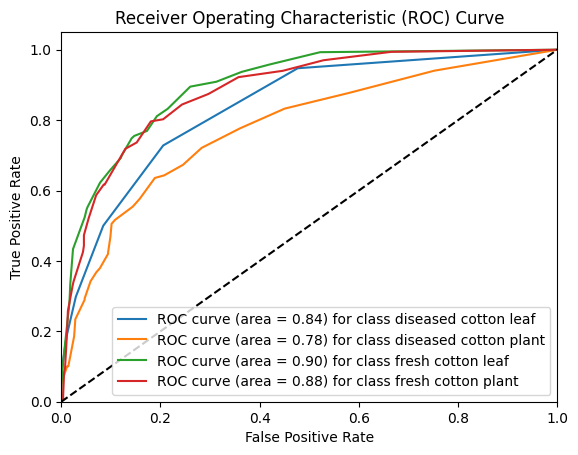

In [30]:
import os
import numpy as np
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import matplotlib.pyplot as plt

# Helper function to load images
def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = []
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

# Fetch image paths from different subdirectories
imagePaths_fp = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/test")
imagePaths_fl = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/train")
imagePaths_dl = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/val")

# Combine all image paths into a single list
imagePaths = imagePaths_dl + imagePaths_fl + imagePaths_fp

data = []
labels = []

# Loop through each image, load it, and preprocess it
for image in imagePaths:
    label = os.path.split(os.path.split(image)[0])[1]
    labels.append(label)

    img = cv2.imread(image)
    img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
    data.append(img)

# Encode the labels as integers
data = np.array(data)
labels = np.array(labels)

le = LabelEncoder()
labels = le.fit_transform(labels)

# Split dataset into 70% training and 30% testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.30, random_state=42)

# Normalize image data
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

# PyTorch dataset definition
class ImageDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Data transformation (PyTorch's transforms for data augmentation)
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor()
])

# Create PyTorch Datasets and DataLoaders
train_dataset = ImageDataset(trainX, trainY, transform=transform)
test_dataset = ImageDataset(testX, testY, transform=transforms.ToTensor())

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Partition the data to simulate clients in Federated Learning
def create_clients(data, labels, num_clients=5):
    client_data = []
    split_size = len(data) // num_clients
    for i in range(num_clients):
        client_data.append((data[i * split_size:(i + 1) * split_size], labels[i * split_size:(i + 1) * split_size]))
    return client_data

# Create 5 clients
clients = create_clients(trainX, trainY, num_clients=5)

# Federated Learning process with KNN on each client
def client_knn_train(client_data, n_neighbors=3):
    # Unpack client data
    X_train, y_train = client_data
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train.reshape(X_train.shape[0], -1), y_train)
    return knn

# Train KNN model on each client and store the models
client_models = []
for client_data in clients:
    model = client_knn_train(client_data)
    client_models.append(model)

# Aggregate predictions from clients
def federated_knn_predict(client_models, X_test):
    X_test = X_test.reshape(X_test.shape[0], -1)
    predictions = []
    probabilities = []

    for model in client_models:
        preds = model.predict(X_test)
        preds_proba = model.predict_proba(X_test)  # Get probabilities
        predictions.append(preds)
        probabilities.append(preds_proba)

    predictions = np.array(predictions)
    probabilities = np.array(probabilities)
    aggregated_predictions = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)
    
    return aggregated_predictions, probabilities.mean(axis=0)  # Average probabilities

# Test the federated KNN model
predicted_labels, predicted_probs = federated_knn_predict(client_models, testX)

# Calculate accuracy
accuracy = accuracy_score(testY, predicted_labels)
print(f"Federated KNN Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print(classification_report(testY, predicted_labels, target_names=le.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(testY, predicted_labels)
print("Confusion matrix is:")
print(conf_matrix)

# Calculate the ROC curve and AUC for each class
n_classes = len(le.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(testY == i, predicted_probs[:, i])  # Binary classification for class i
    roc_auc[i] = auc(fpr[i], tpr[i])  # Area under the curve

# Plot the ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {le.classes_[i]}')
    
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Random Forest Using Federated Learning

Federated Random Forest Accuracy: 64.07%
                       precision    recall  f1-score   support

 diseased cotton leaf       0.92      0.31      0.46       114
diseased cotton plant       0.59      0.88      0.70       269
    fresh cotton leaf       0.75      0.69      0.72       143
   fresh cotton plant       0.61      0.44      0.51       167

             accuracy                           0.64       693
            macro avg       0.72      0.58      0.60       693
         weighted avg       0.68      0.64      0.62       693

Confusion matrix is:
[[ 35  47  19  13]
 [  1 236   9  23]
 [  1  31  99  12]
 [  1  87   5  74]]


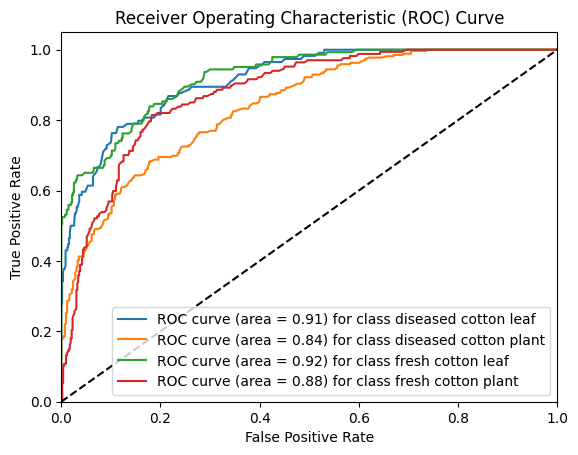

In [31]:
import os
import numpy as np
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import matplotlib.pyplot as plt

# Helper function to load images
def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = []
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

# Fetch image paths from different subdirectories
imagePaths_fp = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/test")
imagePaths_fl = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/train")
imagePaths_dl = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/val")

# Combine all image paths into a single list
imagePaths = imagePaths_dl + imagePaths_fl + imagePaths_fp

data = []
labels = []

# Loop through each image, load it, and preprocess it
for image in imagePaths:
    label = os.path.split(os.path.split(image)[0])[1]
    labels.append(label)

    img = cv2.imread(image)
    img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
    data.append(img)

# Encode the labels as integers
data = np.array(data)
labels = np.array(labels)

le = LabelEncoder()
labels = le.fit_transform(labels)

# Split dataset into 70% training and 30% testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.30, random_state=42)

# Normalize image data
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

# PyTorch dataset definition
class ImageDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Data transformation (PyTorch's transforms for data augmentation)
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor()
])

# Create PyTorch Datasets and DataLoaders
train_dataset = ImageDataset(trainX, trainY, transform=transform)
test_dataset = ImageDataset(testX, testY, transform=transforms.ToTensor())

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Partition the data to simulate clients in Federated Learning
def create_clients(data, labels, num_clients=5):
    client_data = []
    split_size = len(data) // num_clients
    for i in range(num_clients):
        client_data.append((data[i * split_size:(i + 1) * split_size], labels[i * split_size:(i + 1) * split_size]))
    return client_data

# Create 5 clients
clients = create_clients(trainX, trainY, num_clients=5)

# Federated Learning process with Random Forest on each client
def client_rf_train(client_data, n_estimators=100):
    # Unpack client data
    X_train, y_train = client_data
    rf = RandomForestClassifier(n_estimators=n_estimators)
    rf.fit(X_train.reshape(X_train.shape[0], -1), y_train)
    return rf

# Train Random Forest model on each client and store the models
client_models = []
for client_data in clients:
    model = client_rf_train(client_data)
    client_models.append(model)

# Aggregate predictions from clients
def federated_rf_predict(client_models, X_test):
    X_test = X_test.reshape(X_test.shape[0], -1)
    predictions = []

    for model in client_models:
        preds = model.predict(X_test)
        predictions.append(preds)

    # Aggregate predictions by majority voting
    predictions = np.array(predictions)
    aggregated_predictions = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)
    
    return aggregated_predictions

# Test the federated Random Forest model
predicted_labels = federated_rf_predict(client_models, testX)

# Calculate accuracy
accuracy = accuracy_score(testY, predicted_labels)
print(f"Federated Random Forest Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print(classification_report(testY, predicted_labels, target_names=le.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(testY, predicted_labels)
print("Confusion matrix is:")
print(conf_matrix)

# Calculate the ROC curve and AUC for each class
n_classes = len(le.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

# For Random Forest, we can get the probabilities for ROC calculation
def federated_rf_predict_proba(client_models, X_test):
    X_test = X_test.reshape(X_test.shape[0], -1)
    probabilities = []

    for model in client_models:
        probs = model.predict_proba(X_test)
        probabilities.append(probs)

    probabilities = np.array(probabilities)
    return probabilities.mean(axis=0)  # Average probabilities

predicted_probs = federated_rf_predict_proba(client_models, testX)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(testY == i, predicted_probs[:, i])  # Binary classification for class i
    roc_auc[i] = auc(fpr[i], tpr[i])  # Area under the curve

# Plot the ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {le.classes_[i]}')
    
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


work on MobileNet, ResNet, Update the word doc without fedearted learning, **Random Forest, SVM (without federated learning).**

# Random Forest

Processed 2310 images
                       precision    recall  f1-score   support

 diseased cotton leaf       0.89      0.44      0.59       114
diseased cotton plant       0.63      0.85      0.72       269
    fresh cotton leaf       0.80      0.80      0.80       143
   fresh cotton plant       0.63      0.49      0.55       167

             accuracy                           0.69       693
            macro avg       0.74      0.64      0.67       693
         weighted avg       0.71      0.69      0.68       693

Accuracy: 68.54%
Confusion matrix is:
[[ 50  40  14  10]
 [  2 229   9  29]
 [  3  16 114  10]
 [  1  79   5  82]]


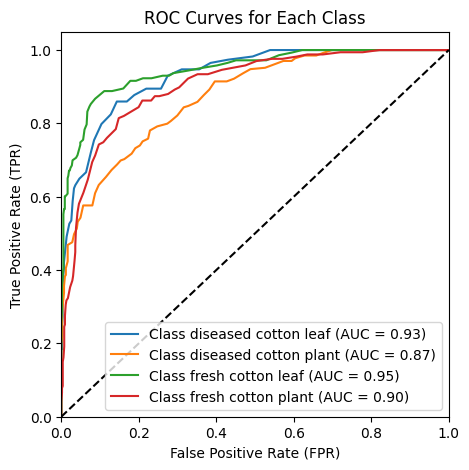

In [32]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sns  # Make sure to import seaborn for heatmap plotting


# Function to get a list of all files in a directory and its subdirectories
def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = []
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

# Fetch image paths from different subdirectories
imagePaths_fp = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/test")
imagePaths_fl = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/train")
imagePaths_dl = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/val")

# Combine all image paths into a single list
imagePaths = imagePaths_dl + imagePaths_fl + imagePaths_fp

data = []
labels = []
c = 0  # To track the progress

# Loop through each image, load it, and preprocess it
for image in imagePaths:
    label = os.path.split(os.path.split(image)[0])[1]
    labels.append(label)

    img = cv2.imread(image)
    img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_AREA)
    data.append(img)
    c += 1
print(f"Processed {c} images")

# Encode the labels as integers
data = np.array(data)
labels = np.array(labels)

le = LabelEncoder()
labels = le.fit_transform(labels)

# Flatten the image data for Random Forest
data_flattened = data.reshape((data.shape[0], -1))

# Split dataset into 70% training and 30% testing
(trainX, testX, trainY, testY) = train_test_split(data_flattened, labels, test_size=0.30, random_state=42)

# Build and train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(trainX, trainY)

# Predictions
predictions = rf_model.predict(testX)

# Print classification report
print(classification_report(testY, predictions, target_names=le.classes_))

# Calculate accuracy
accuracy = accuracy_score(testY, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
conf_matrix = confusion_matrix(testY, predictions)
print("Confusion matrix is:")
print(conf_matrix)

# ROC curve and AUC calculation
# Get probabilities for ROC calculation
y_prob = rf_model.predict_proba(testX)

# Binarize the true labels for multi-class ROC
y_bin = label_binarize(testY, classes=list(range(len(le.classes_))))

# Variables for ROC calculation
tpr = dict()
fpr = dict()
roc_auc = dict()

# Calculate ROC for each class
for i in range(len(le.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(5, 5))

for i in range(len(le.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--')

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Each Class')
plt.legend(loc="lower right")
plt.show()


# SVM

Processed 2310 images
                       precision    recall  f1-score   support

 diseased cotton leaf       0.55      0.54      0.54       114
diseased cotton plant       0.76      0.76      0.76       269
    fresh cotton leaf       0.66      0.69      0.67       143
   fresh cotton plant       0.65      0.63      0.64       167

             accuracy                           0.68       693
            macro avg       0.65      0.65      0.65       693
         weighted avg       0.68      0.68      0.68       693

Accuracy: 67.82%
Confusion matrix is:
[[ 61  16  21  16]
 [ 16 205  17  31]
 [ 26   9  98  10]
 [  7  41  13 106]]


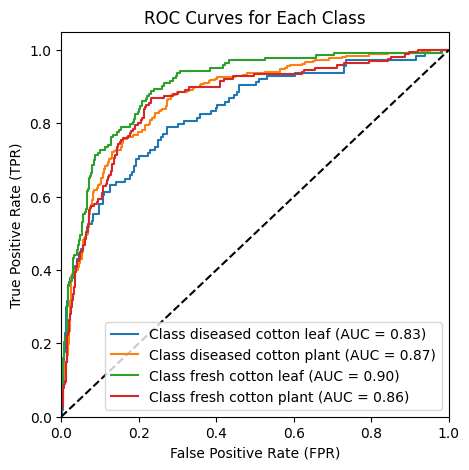

In [33]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn import metrics
import seaborn as sns  # Make sure to import seaborn for heatmap plotting


# Function to get a list of all files in a directory and its subdirectories
def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = []
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

# Fetch image paths from different subdirectories
imagePaths_fp = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/test")
imagePaths_fl = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/train")
imagePaths_dl = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/val")

# Combine all image paths into a single list
imagePaths = imagePaths_dl + imagePaths_fl + imagePaths_fp

data = []
labels = []
c = 0  # To track the progress

# Loop through each image, load it, and preprocess it
for image in imagePaths:
    label = os.path.split(os.path.split(image)[0])[1]
    labels.append(label)

    img = cv2.imread(image)
    img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_AREA)
    data.append(img)
    c += 1
print(f"Processed {c} images")

# Encode the labels as integers
data = np.array(data)
labels = np.array(labels)

le = LabelEncoder()
labels = le.fit_transform(labels)

# Flatten the image data for SVM
data_flattened = data.reshape((data.shape[0], -1))

# Split dataset into 70% training and 30% testing
(trainX, testX, trainY, testY) = train_test_split(data_flattened, labels, test_size=0.30, random_state=42)

# Normalize image data for SVM (scaling improves performance)
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

# Build and train an SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Train the model
svm_model.fit(trainX, trainY)

# Predictions
predictions = svm_model.predict(testX)

# Print classification report
print(classification_report(testY, predictions, target_names=le.classes_))

# Calculate accuracy
accuracy = accuracy_score(testY, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
conf_matrix = confusion_matrix(testY, predictions)
print("Confusion matrix is:")
print(conf_matrix)

# ROC curve and AUC calculation
# Get probabilities for ROC calculation
y_prob = svm_model.predict_proba(testX)

# Binarize the true labels for multi-class ROC
y_bin = label_binarize(testY, classes=list(range(len(le.classes_))))

# Variables for ROC calculation
tpr = dict()
fpr = dict()
roc_auc = dict()

# Calculate ROC for each class
for i in range(len(le.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(5, 5))

for i in range(len(le.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--')

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Each Class')
plt.legend(loc="lower right")
plt.show()


# MobileNet without Data Augmentation

Processed 2310 images
9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10
51/51 [==============================] - 11s 134ms/step - loss: 0.3621 - accuracy: 0.8664 - val_loss: 0.1866 - val_accuracy: 0.9221
Epoch 2/10
51/51 [==============================] - 3s 58ms/step - loss: 0.1014 - accuracy: 0.9623 - val_loss: 0.1233 - val_accuracy: 0.9553
Epoch 3/10
51/51 [==============================] - 3s 59ms/step - loss: 0.0563 - accuracy: 0.9827 - val_loss: 0.1892 - val_accuracy: 0.9293
Epoch 4/10
51/51 [==============================] - 3s 59ms/step - loss: 0.0691 - accuracy: 0.9734 - val_loss: 0.1134 - val_accuracy: 0.9596
Epoch 5/10
51/51 [==============================] - 3s 59ms/step - loss: 0.0408 - accuracy: 0.9802 - val_loss: 0.1569 - val_accuracy: 0.9509
Epoch 6/10
51/51 [==============================] - 3s 59ms/step - loss: 0.0271 - accuracy: 0.9920 - val_loss: 0.1221 - val_accuracy: 0.9582
Epoch 7/10
51/51 [==============================] - 3s 59ms/step - 

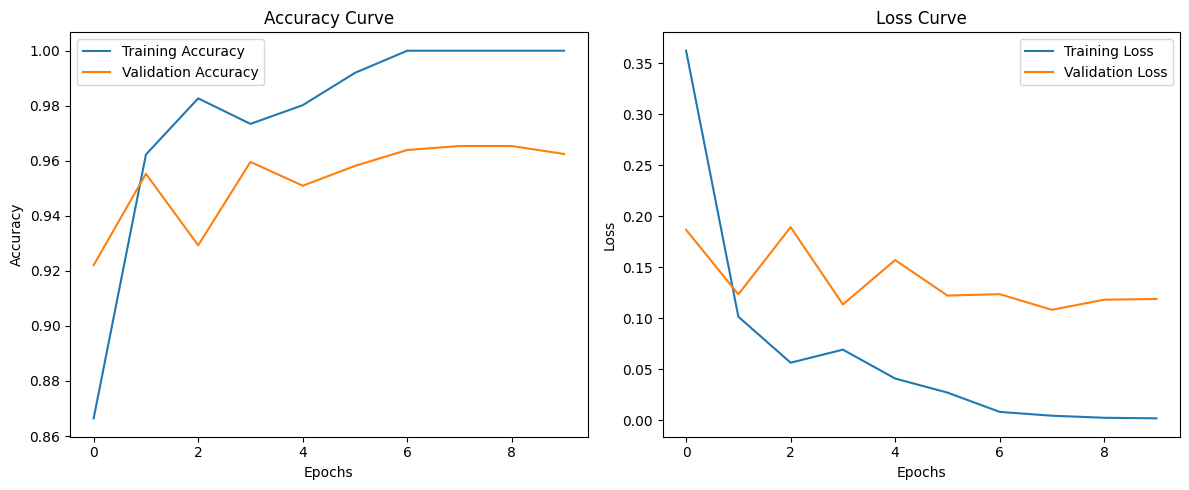

22/22 [==============================] - 2s 40ms/step
                       precision    recall  f1-score   support

 diseased cotton leaf       0.99      0.96      0.97       114
diseased cotton plant       0.96      0.97      0.97       269
    fresh cotton leaf       0.95      0.97      0.96       143
   fresh cotton plant       0.96      0.95      0.95       167

             accuracy                           0.96       693
            macro avg       0.96      0.96      0.96       693
         weighted avg       0.96      0.96      0.96       693

Accuracy: 96.25%
Confusion matrix is:
[[109   0   5   0]
 [  0 261   1   7]
 [  1   3 139   0]
 [  0   7   2 158]]


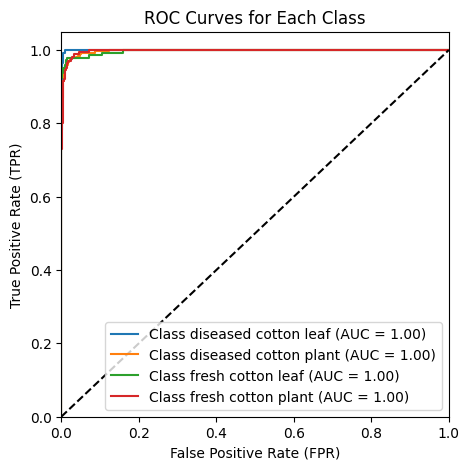

In [34]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
import seaborn as sns

# Function to get a list of all files in a directory and its subdirectories
def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = []
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

# Fetch image paths from different subdirectories
imagePaths_fp = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/test")
imagePaths_fl = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/train")
imagePaths_dl = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/val")

# Combine all image paths into a single list
imagePaths = imagePaths_dl + imagePaths_fl + imagePaths_fp

data = []
labels = []
c = 0  # To track the progress

# Loop through each image, load it, and preprocess it
for image in imagePaths:
    label = os.path.split(os.path.split(image)[0])[1]
    labels.append(label)

    img = cv2.imread(image)
    img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # Resize to 224x224 for MobileNet
    img = img_to_array(img)
    data.append(img)
    c += 1
print(f"Processed {c} images")

# Encode the labels as integers
data = np.array(data, dtype="float32") / 255.0  # Normalize the data
labels = np.array(labels)

le = LabelEncoder()
labels = le.fit_transform(labels)

# Convert labels to categorical (one-hot encoding)
labels = to_categorical(labels)

# Split dataset into 70% training and 30% testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.30, random_state=42)

# Load the MobileNetV2 model, excluding the top layer (to add our custom layers)
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of MobileNetV2
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling to reduce the dimensionality
x = Dense(256, activation='relu')(x)  # Add fully connected layer
x = Dense(128, activation='relu')(x)  # Another fully connected layer

# Output layer (softmax for multi-class classification)
num_classes = labels.shape[1]
predictions = Dense(num_classes, activation='softmax')(x)

# Combine the base model with the new layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers in the base model to avoid retraining them
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY))

# Plot accuracy and loss curves
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Predictions
predictions = model.predict(testX)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(testY, axis=1)

# Print classification report
print(classification_report(true_labels, predicted_labels, target_names=le.classes_))

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix is:")
print(conf_matrix)


# ROC curve and AUC calculation
# Binarize the true labels for multi-class ROC
y_bin = label_binarize(true_labels, classes=list(range(num_classes)))

# Variables for ROC calculation
tpr = dict()
fpr = dict()
roc_auc = dict()

# Calculate ROC for each class
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(5, 5))

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--')

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Each Class')
plt.legend(loc="lower right")
plt.show()


# MobileNet with Data Augmentation

Processed 2310 images
Epoch 1/10
50/50 [==============================] - 20s 335ms/step - loss: 0.4774 - accuracy: 0.8252 - val_loss: 0.2219 - val_accuracy: 0.9163
Epoch 2/10
50/50 [==============================] - 15s 307ms/step - loss: 0.2674 - accuracy: 0.8953 - val_loss: 0.1584 - val_accuracy: 0.9423
Epoch 3/10
50/50 [==============================] - 15s 308ms/step - loss: 0.2118 - accuracy: 0.9192 - val_loss: 0.1559 - val_accuracy: 0.9509
Epoch 4/10
50/50 [==============================] - 15s 307ms/step - loss: 0.1766 - accuracy: 0.9413 - val_loss: 0.1313 - val_accuracy: 0.9481
Epoch 5/10
50/50 [==============================] - 16s 321ms/step - loss: 0.1422 - accuracy: 0.9426 - val_loss: 0.2856 - val_accuracy: 0.8961
Epoch 6/10
50/50 [==============================] - 16s 313ms/step - loss: 0.1787 - accuracy: 0.9274 - val_loss: 0.1230 - val_accuracy: 0.9582
Epoch 7/10
50/50 [==============================] - 15s 308ms/step - loss: 0.1371 - accuracy: 0.9539 - val_loss: 0.2239 

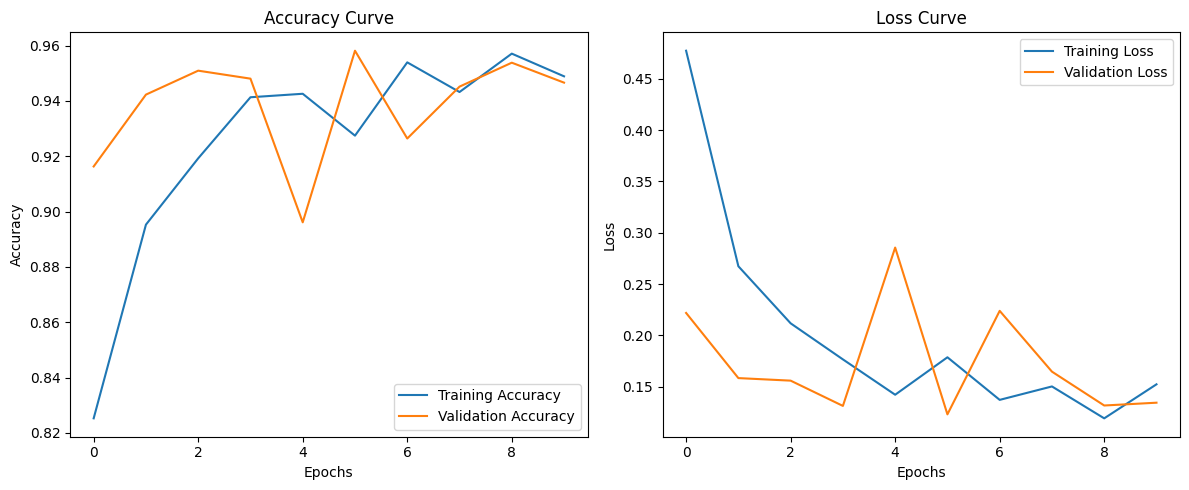

22/22 [==============================] - 2s 40ms/step
                       precision    recall  f1-score   support

 diseased cotton leaf       0.97      0.94      0.96       114
diseased cotton plant       0.96      0.94      0.95       269
    fresh cotton leaf       0.92      0.97      0.95       143
   fresh cotton plant       0.93      0.94      0.93       167

             accuracy                           0.95       693
            macro avg       0.95      0.95      0.95       693
         weighted avg       0.95      0.95      0.95       693

Accuracy: 94.66%
Confusion matrix is:
[[107   0   7   0]
 [  1 253   3  12]
 [  2   2 139   0]
 [  0   8   2 157]]


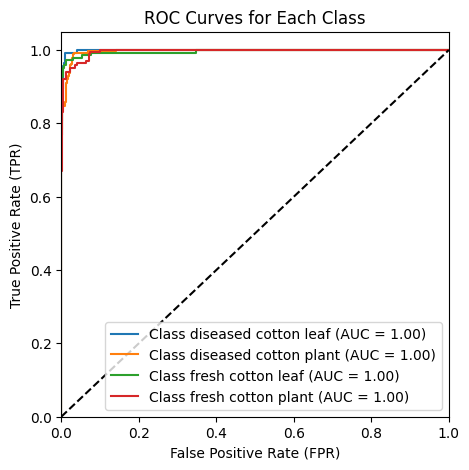

In [35]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns

# Function to get a list of all files in a directory and its subdirectories
def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = []
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

# Fetch image paths from different subdirectories
imagePaths_fp = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/test")
imagePaths_fl = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/train")
imagePaths_dl = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/val")

# Combine all image paths into a single list
imagePaths = imagePaths_dl + imagePaths_fl + imagePaths_fp

data = []
labels = []
c = 0  # To track the progress

# Loop through each image, load it, and preprocess it
for image in imagePaths:
    label = os.path.split(os.path.split(image)[0])[1]
    labels.append(label)

    img = cv2.imread(image)
    img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # Resize to 224x224 for MobileNet
    img = img_to_array(img)
    data.append(img)
    c += 1
print(f"Processed {c} images")

# Encode the labels as integers
data = np.array(data, dtype="float32") / 255.0  # Normalize the data
labels = np.array(labels)

le = LabelEncoder()
labels = le.fit_transform(labels)

# Convert labels to categorical (one-hot encoding)
labels = to_categorical(labels)

# Split dataset into 70% training and 30% testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.30, random_state=42)

# Create an instance of ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,       # Random rotation
    width_shift_range=0.2,   # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    shear_range=0.2,        # Random shear
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,    # Random horizontal flip
    fill_mode='nearest'      # Fill in new pixels
)

# Fit the generator to the training data
datagen.fit(trainX)

# Load the MobileNetV2 model, excluding the top layer (to add our custom layers)
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of MobileNetV2
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling to reduce the dimensionality
x = Dense(256, activation='relu')(x)  # Add fully connected layer
x = Dense(128, activation='relu')(x)  # Another fully connected layer

# Output layer (softmax for multi-class classification)
num_classes = labels.shape[1]
predictions = Dense(num_classes, activation='softmax')(x)

# Combine the base model with the new layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers in the base model to avoid retraining them
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the data generator
history = model.fit(datagen.flow(trainX, trainY, batch_size=32),
                    epochs=10,
                    validation_data=(testX, testY),
                    steps_per_epoch=len(trainX) // 32)

# Plot accuracy and loss curves
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Predictions
predictions = model.predict(testX)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(testY, axis=1)

# Print classification report
print(classification_report(true_labels, predicted_labels, target_names=le.classes_))

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix is:")
print(conf_matrix)

# ROC curve and AUC calculation
# Binarize the true labels for multi-class ROC
y_bin = label_binarize(true_labels, classes=list(range(num_classes)))

# Variables for ROC calculation
tpr = dict()
fpr = dict()
roc_auc = dict()

# Calculate ROC for each class
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(5, 5))

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--')

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Each Class')
plt.legend(loc="lower right")
plt.show()


# ResNet50 without Data Augmentation

Processed 2310 images
94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/10
51/51 [==============================] - 19s 251ms/step - loss: 1.3638 - accuracy: 0.3810 - val_loss: 1.3768 - val_accuracy: 0.2511
Epoch 2/10
51/51 [==============================] - 7s 147ms/step - loss: 1.3184 - accuracy: 0.4032 - val_loss: 1.3737 - val_accuracy: 0.2915
Epoch 3/10
51/51 [==============================] - 7s 144ms/step - loss: 1.2702 - accuracy: 0.4273 - val_loss: 1.2862 - val_accuracy: 0.4589
Epoch 4/10
51/51 [==============================] - 7s 141ms/step - loss: 1.2116 - accuracy: 0.4842 - val_loss: 1.1843 - val_accuracy: 0.4935
Epoch 5/10
51/51 [==============================] - 7s 139ms/step - loss: 1.1601 - accuracy: 0.5306 - val_loss: 1.1454 - val_accuracy: 0.4776
Epoch 6/10
51/51 [==============================] - 7s 138ms/step - loss: 1.0563 - accuracy: 0.5807 - val_loss: 1.0279 - val_accuracy: 0.5960
Epoch 7/10
51/51 [==============================] - 7s 137ms

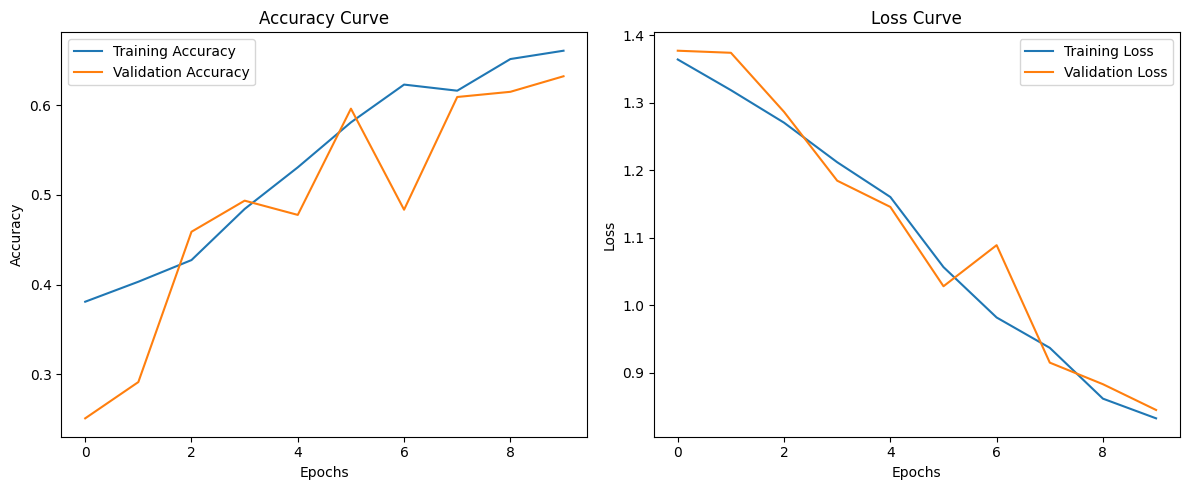

22/22 [==============================] - 3s 97ms/step
                       precision    recall  f1-score   support

 diseased cotton leaf       0.97      0.29      0.45       114
diseased cotton plant       0.59      0.95      0.73       269
    fresh cotton leaf       0.66      0.90      0.76       143
   fresh cotton plant       0.72      0.13      0.21       167

             accuracy                           0.63       693
            macro avg       0.74      0.57      0.54       693
         weighted avg       0.70      0.63      0.56       693

Accuracy: 63.20%
Confusion matrix is:
[[ 33  57  24   0]
 [  1 256  10   2]
 [  0   9 128   6]
 [  0 114  32  21]]


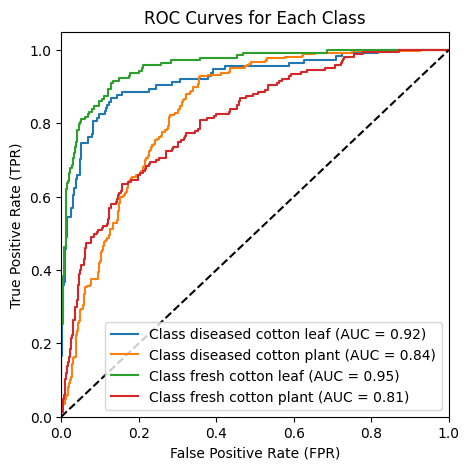

In [36]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
import seaborn as sns

# Function to get a list of all files in a directory and its subdirectories
def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = []
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

# Fetch image paths from different subdirectories
imagePaths_fp = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/test")
imagePaths_fl = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/train")
imagePaths_dl = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/val")

# Combine all image paths into a single list
imagePaths = imagePaths_dl + imagePaths_fl + imagePaths_fp

data = []
labels = []
c = 0  # To track the progress

# Loop through each image, load it, and preprocess it
for image in imagePaths:
    label = os.path.split(os.path.split(image)[0])[1]
    labels.append(label)

    img = cv2.imread(image)
    img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # Resize to 224x224 for ResNet
    img = img_to_array(img)
    data.append(img)
    c += 1
print(f"Processed {c} images")

# Encode the labels as integers
data = np.array(data, dtype="float32") / 255.0  # Normalize the data
labels = np.array(labels)

le = LabelEncoder()
labels = le.fit_transform(labels)

# Convert labels to categorical (one-hot encoding)
labels = to_categorical(labels)

# Split dataset into 70% training and 30% testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.30, random_state=42)

# Load the ResNet50 model, excluding the top layer (to add our custom layers)
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling to reduce the dimensionality
x = Dense(256, activation='relu')(x)  # Add fully connected layer
x = Dense(128, activation='relu')(x)  # Another fully connected layer

# Output layer (softmax for multi-class classification)
num_classes = labels.shape[1]
predictions = Dense(num_classes, activation='softmax')(x)

# Combine the base model with the new layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers in the base model to avoid retraining them
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY))

# Plot accuracy and loss curves
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Predictions
predictions = model.predict(testX)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(testY, axis=1)

# Print classification report
print(classification_report(true_labels, predicted_labels, target_names=le.classes_))

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix is:")
print(conf_matrix)

# ROC curve and AUC calculation
# Binarize the true labels for multi-class ROC
y_bin = label_binarize(true_labels, classes=list(range(num_classes)))

# Variables for ROC calculation
tpr = dict()
fpr = dict()
roc_auc = dict()

# Calculate ROC for each class
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(5, 5))

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--')

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Each Class')
plt.legend(loc="lower right")
plt.show()


Update the doc file results& discussion, Code: CNN - {MobileNet, ResNet50} -(with data Augmentation)

# ResNet50 With Data Augmentation

Processed 2310 images
Epoch 1/10
51/51 [==============================] - 22s 369ms/step - loss: 1.3609 - accuracy: 0.3506 - val_loss: 1.3175 - val_accuracy: 0.3896
Epoch 2/10
51/51 [==============================] - 17s 335ms/step - loss: 1.3119 - accuracy: 0.3927 - val_loss: 1.3745 - val_accuracy: 0.2352
Epoch 3/10
51/51 [==============================] - 17s 337ms/step - loss: 1.3264 - accuracy: 0.3816 - val_loss: 1.2822 - val_accuracy: 0.3896
Epoch 4/10
51/51 [==============================] - 17s 335ms/step - loss: 1.2753 - accuracy: 0.4341 - val_loss: 1.2581 - val_accuracy: 0.3954
Epoch 5/10
51/51 [==============================] - 17s 332ms/step - loss: 1.2435 - accuracy: 0.4465 - val_loss: 1.2201 - val_accuracy: 0.5094
Epoch 6/10
51/51 [==============================] - 17s 335ms/step - loss: 1.2507 - accuracy: 0.4502 - val_loss: 1.2716 - val_accuracy: 0.4141
Epoch 7/10
51/51 [==============================] - 17s 332ms/step - loss: 1.2288 - accuracy: 0.4706 - val_loss: 1.2918 

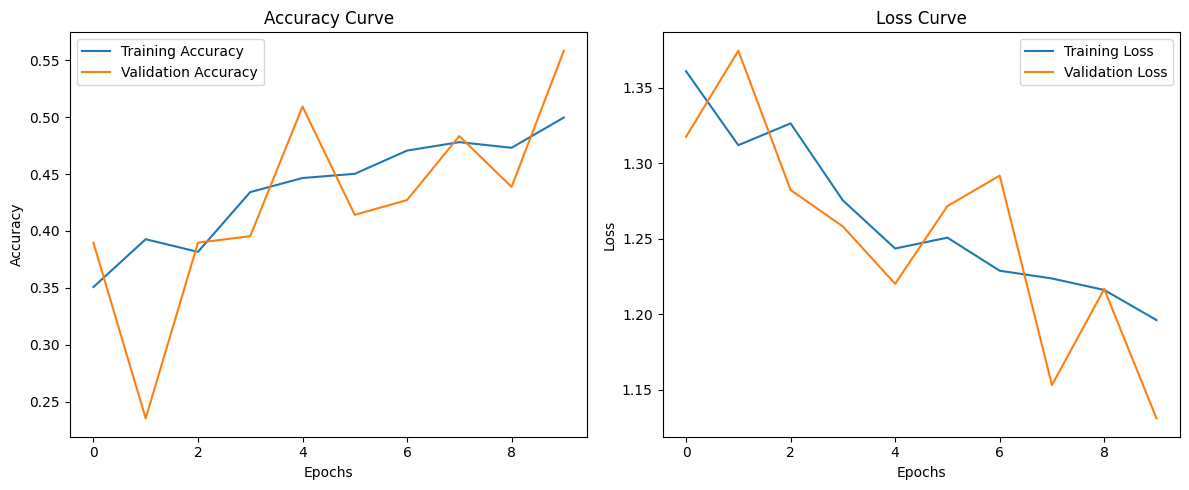

22/22 [==============================] - 3s 98ms/step
                       precision    recall  f1-score   support

 diseased cotton leaf       0.43      0.60      0.50       114
diseased cotton plant       0.54      0.80      0.64       269
    fresh cotton leaf       0.76      0.73      0.74       143
   fresh cotton plant       0.00      0.00      0.00       167

             accuracy                           0.56       693
            macro avg       0.43      0.53      0.47       693
         weighted avg       0.44      0.56      0.49       693

Accuracy: 55.84%
Confusion matrix is:
[[ 68  36  10   0]
 [ 50 215   4   0]
 [ 10  29 104   0]
 [ 29 119  19   0]]


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


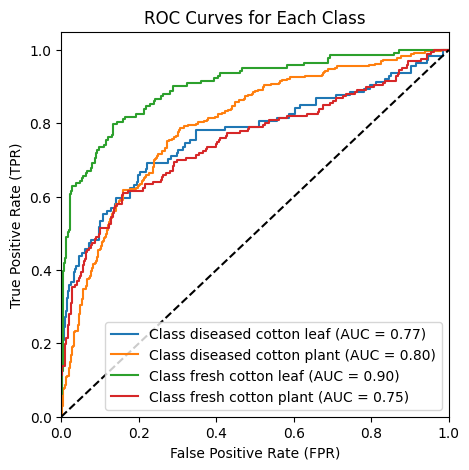

In [37]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import seaborn as sns

# Function to get a list of all files in a directory and its subdirectories
def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = []
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

# Fetch image paths from different subdirectories
imagePaths_fp = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/test")
imagePaths_fl = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/train")
imagePaths_dl = getListOfFiles("/kaggle/input/cotton-disease-dataset/Cotton Disease/val")

# Combine all image paths into a single list
imagePaths = imagePaths_dl + imagePaths_fl + imagePaths_fp

data = []
labels = []
c = 0  # To track the progress

# Loop through each image, load it, and preprocess it
for image in imagePaths:
    label = os.path.split(os.path.split(image)[0])[1]
    labels.append(label)

    img = cv2.imread(image)
    img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # Resize to 224x224 for ResNet
    img = img_to_array(img)
    data.append(img)
    c += 1
print(f"Processed {c} images")

# Encode the labels as integers
data = np.array(data, dtype="float32") / 255.0  # Normalize the data
labels = np.array(labels)

le = LabelEncoder()
labels = le.fit_transform(labels)

# Convert labels to categorical (one-hot encoding)
labels = to_categorical(labels)

# Split dataset into 70% training and 30% testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.30, random_state=42)

# Create an instance of ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the generator on the training data
train_datagen.fit(trainX)

# Load the ResNet50 model, excluding the top layer (to add our custom layers)
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling to reduce the dimensionality
x = Dense(256, activation='relu')(x)  # Add fully connected layer
x = Dense(128, activation='relu')(x)  # Another fully connected layer

# Output layer (softmax for multi-class classification)
num_classes = labels.shape[1]
predictions = Dense(num_classes, activation='softmax')(x)

# Combine the base model with the new layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers in the base model to avoid retraining them
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the augmented data
history = model.fit(train_datagen.flow(trainX, trainY, batch_size=32),
                    epochs=10,
                    validation_data=(testX, testY))

# Plot accuracy and loss curves
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Predictions
predictions = model.predict(testX)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(testY, axis=1)

# Print classification report
print(classification_report(true_labels, predicted_labels, target_names=le.classes_))

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix is:")
print(conf_matrix)

# ROC curve and AUC calculation
# Binarize the true labels for multi-class ROC
y_bin = label_binarize(true_labels, classes=list(range(num_classes)))

# Variables for ROC calculation
tpr = dict()
fpr = dict()
roc_auc = dict()

# Calculate ROC for each class
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(5, 5))

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--')

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Each Class')
plt.legend(loc="lower right")
plt.show()
